# Pandas 包

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
% matplotlib inline
import seaborn as sns

# Series

In [3]:
s1 = pd.Series([1,2,3,4,np.nan,5,6,7])
s1

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
6    6.0
7    7.0
dtype: float64

In [6]:
s1.values #实际就是一个numpy array

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [7]:
s1.index

RangeIndex(start=0, stop=8, step=1)

In [21]:
s2 = pd.Series([21,27,23,20,22],index=["a",'b', 'c', 'd', 'e'])
s2

a    21
b    27
c    23
d    20
e    22
dtype: int64

In [22]:
 s2["c"]

23

In [23]:
s2.loc['c']#loc需要index的名称

23

In [24]:
s2.iloc[1]#iloc需要给定index位置

27

In [25]:
print(s2.shape)
print(s2.size)
print("\n")

print(s2.head(1))
print("\n")

print(s2.describe())

(5,)
5


a    21
dtype: int64


count     5.000000
mean     22.600000
std       2.701851
min      20.000000
25%      21.000000
50%      22.000000
75%      23.000000
max      27.000000
dtype: float64


In [26]:
s2.sort_values()

d    20
a    21
e    22
c    23
b    27
dtype: int64

In [27]:
#Check the ch who is bigger than 22
s2[s2>22]

b    27
c    23
dtype: int64

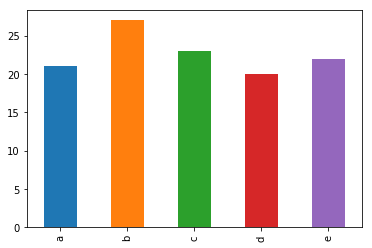

In [30]:
s2.plot.bar()

In [31]:
'c' in s2

True

In [34]:
s2_dict = s2.to_dict()#把index变成dictionary的key
s2_dict

{'a': 21, 'b': 27, 'c': 23, 'd': 20, 'e': 22}

In [35]:
s2_series = pd.Series(s2_dict)#将dict变成series
s2_series

a    21
b    27
c    23
d    20
e    22
dtype: int64

In [38]:
ch_s = ['a','b', 'c', 'd', 'e']
s2_new = pd.Series(s2_dict, index = ch_s)
s2_new

a    21
b    27
c    23
d    20
e    22
dtype: int64

In [45]:
s2_new1 = pd.Series([1,1,2,3,4,4], index = ["a","b","c","d","e","f"])
s2_new1.drop_duplicates()#drop the duplicate in value，去除重复的值

a    1
c    2
d    3
e    4
dtype: int64

In [43]:
pd.isnull(s1)#是空值就为True 非空值为false

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
dtype: bool

# DataFrame

In [78]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]], index=["A","B"], columns=['C1','C2', 'C3'])
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [52]:
df1.values

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [53]:
df1.index

Index(['A', 'B'], dtype='object')

In [56]:
df1.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [54]:
df1.shape

(2, 3)

In [55]:
df1.size

6

# Method

In [79]:
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [58]:
df.head(1)

,C1,C2,C3
A,1,2,3


In [59]:
df.tail(1)

,C1,C2,C3
B,4,5,6


In [60]:
df.describe()

,C1,C2,C3
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [61]:
df.loc['B']

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [63]:
df.loc["B"].loc["C2"]

5

In [65]:
df["C2"].loc['B']

5

In [66]:
df.loc['B',"C2"]

5

In [67]:
df.iloc[1,1]

5

In [68]:
df+10*15

,C1,C2,C3
A,151,152,153
B,154,155,156


In [80]:
df1["C2"] = df1.apply(lambda x:x['C2'] ** 2 +10, axis=1)
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


In [84]:
df1.assign(C2 = lambda x:x["C2"] + 100,
          C3 = lambda x:x["C3"] - 100)\
        .loc['A']\
        .max()

114

# Titanic example

In [3]:
df2 = pd.read_csv('Titanic_train.csv')
df2.shape

(891, 12)

In [4]:
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


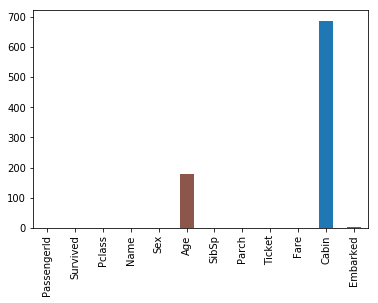

In [16]:
print(df2.isnull().sum())
df2.isnull().sum().plot(kind='bar')

In [10]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


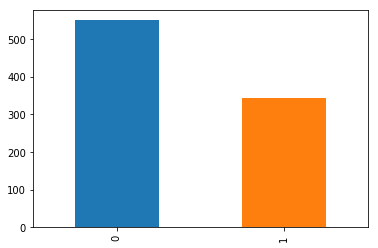

In [14]:
print(df2.Survived.value_counts())
df2.Survived.value_counts().plot(kind='bar')

In [12]:
df2.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# 如何操作数据

In [18]:
df3 = df2.drop('Cabin',axis=1)

In [20]:
df3.shape

(891, 11)

In [21]:
df3['Age'] = df3['Age'].fillna(20)

In [22]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
df4 = df3[df3["Embarked"].notnull()]

In [30]:
#missing value removal
print(df2.isnull().sum())
df5 = df2.drop('Cabin', axis=1).assign(Age = lambda x:x['Age'].fillna(20))
print(df5.isnull().sum())
df5 = df5.loc[df5['Embarked'].notnull()]
print(df5.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [32]:
df5.loc[10:14, ['Name', 'Sex', 'Survived']]#选择对应的数据

,Name,Sex,Survived
10,"Sandstrom, Miss. Marguerite Rut",female,1
11,"Bonnell, Miss. Elizabeth",female,1
12,"Saundercock, Mr. William Henry",male,0
13,"Andersson, Mr. Anders Johan",male,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,0


In [33]:
df5.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
df5.pivot_table(values='PassengerId', index='Survived', columns='Sex', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,231,109


In [37]:
df5['Survived'].corr(df5['Pclass'])#求皮尔森相关系数，有负相关越接近于-1越相关和正相关越接近于1越相关

-0.3355488593568253

# Index Objects

In [38]:
s = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170102', periods=6))
s

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64

In [39]:
s.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [41]:
s.index[3]

Timestamp('2017-01-05 00:00:00', freq='D')

In [42]:
s.index[3:]

DatetimeIndex(['2017-01-05', '2017-01-06', '2017-01-07'], dtype='datetime64[ns]', freq='D')

# ReIndex

In [43]:
np.random.randn(1, 4).tolist()

[[0.013418741351590161,
  -1.2030979880657795,
  -1.0080676097524168,
  0.029426022462511532]]

In [45]:
s1 = pd.Series(np.random.randn(1,4).tolist()[0], index=['A', 'B', 'C', 'D'])
s1

A   -0.373122
B    0.305978
C   -0.339163
D   -0.345977
dtype: float64

## For series, reindex can be smart

In [47]:
s2 = s1.reindex(['A', 'B', 'C', 'D', 'E', 'F'])
s2

A   -0.373122
B    0.305978
C   -0.339163
D   -0.345977
E         NaN
F         NaN
dtype: float64

In [49]:
s2 = s1.reindex(['A', 'B', 'C', 'D', 'E', 'F','G'], fill_value=0)
s2

A   -0.373122
B    0.305978
C   -0.339163
D   -0.345977
E    0.000000
F    0.000000
G    0.000000
dtype: float64

# Pandas Reindex

In [50]:
df = pd.DataFrame(np.random.randn(4,4), index=['r1','r2','r3','r4'], columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
r1,0.208847,-2.302900,0.129646,-0.140299
r2,0.459395,0.573874,0.096700,0.691097
r3,-0.324596,-0.279837,-1.477092,-1.267099
r4,-0.558118,0.919550,-0.792236,-0.474421


In [51]:
df.reindex(['r1','r2','r3','r4','r5'])

,c1,c2,c3,c4
r1,0.208847,-2.302900,0.129646,-0.140299
r2,0.459395,0.573874,0.096700,0.691097
r3,-0.324596,-0.279837,-1.477092,-1.267099
r4,-0.558118,0.919550,-0.792236,-0.474421
r5,NaN,NaN,NaN,NaN


In [53]:
df.reindex(columns = ['c1','c2','c3','c4'])

,c1,c2,c3,c4
r1,0.208847,-2.302900,0.129646,-0.140299
r2,0.459395,0.573874,0.096700,0.691097
r3,-0.324596,-0.279837,-1.477092,-1.267099
r4,-0.558118,0.919550,-0.792236,-0.474421


# Drop Data

In [54]:
s1 = pd.Series(np.arange(5), index=[1,2,3,4,5])
s1

1    0
2    1
3    2
4    3
5    4
dtype: int32

In [55]:
s1.drop(4)

1    0
2    1
3    2
5    4
dtype: int32

## Drop DataFrame

In [57]:
df1 = df
df1.drop('r1')

,c1,c2,c3,c4
r2,0.459395,0.573874,0.096700,0.691097
r3,-0.324596,-0.279837,-1.477092,-1.267099
r4,-0.558118,0.919550,-0.792236,-0.474421


In [59]:
df1.drop('c4', axis=1)#不会直接影响到源数据

,c1,c2,c3
r1,0.208847,-2.302900,0.129646
r2,0.459395,0.573874,0.096700
r3,-0.324596,-0.279837,-1.477092
r4,-0.558118,0.919550,-0.792236


In [60]:
df1

,c1,c2,c3,c4
r1,0.208847,-2.302900,0.129646,-0.140299
r2,0.459395,0.573874,0.096700,0.691097
r3,-0.324596,-0.279837,-1.477092,-1.267099
r4,-0.558118,0.919550,-0.792236,-0.474421


In [61]:
df1.drop("c4", axis=1, inplace=True)#加上inplace就会把源数据替换掉
df1

,c1,c2,c3
r1,0.208847,-2.302900,0.129646
r2,0.459395,0.573874,0.096700
r3,-0.324596,-0.279837,-1.477092
r4,-0.558118,0.919550,-0.792236


# Slice Data

In [62]:
s1 = pd.Series(np.arange(5),index=['A','B','C','D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int32

In [64]:
s2 = s1[:3]
s2

A    0
B    1
C    2
dtype: int32

In [67]:
s2['A']=2018
s1

A    2018
B       1
C       2
D       3
E       4
dtype: int32

In [69]:
s1[["A","B","C"]]

A    2018
B       1
C       2
dtype: int32

In [70]:
s1[s1>2]

A    2018
D       3
E       4
dtype: int32

In [74]:
s1[(s1>2) & (s1<4)] = 6
s1

A    2018
B       1
C       2
D       6
E       4
dtype: int32

### DataFrame和上面用法也是一样的

In [75]:
df1

,c1,c2,c3
r1,0.208847,-2.302900,0.129646
r2,0.459395,0.573874,0.096700
r3,-0.324596,-0.279837,-1.477092
r4,-0.558118,0.919550,-0.792236


In [76]:
df1.loc['r2']

c1    0.459395
c2    0.573874
c3    0.096700
Name: r2, dtype: float64

In [77]:
df1.iloc[[0,2,3], [0,2]]

,c1,c3
r1,0.208847,0.129646
r3,-0.324596,-1.477092
r4,-0.558118,-0.792236


In [81]:
df6 = df1.copy()
df6['c6']=['x','xx','xxx','xxxx']
df6

,c1,c2,c3,c6
r1,0.208847,-2.302900,0.129646,x
r2,0.459395,0.573874,0.096700,xx
r3,-0.324596,-0.279837,-1.477092,xxx
r4,-0.558118,0.919550,-0.792236,xxxx


In [84]:
df6['c6'].isin(['x','xx'])

r1     True
r2     True
r3    False
r4    False
Name: c6, dtype: bool

# Data Alignment

In [92]:
s3 = pd.Series(np.arange(5), index=['A','B','C','D','E'])
s4 = pd.Series(np.arange(3), index=['A','B','C'])

In [93]:
s3+s4#直接相加，但不知道D、E两行怎么加，直接给了NaN

A    0.0
B    2.0
C    4.0
D    NaN
E    NaN
dtype: float64

In [94]:
s3.add(s4,fill_value=0)#给定默认值相加

A    0.0
B    2.0
C    4.0
D    3.0
E    4.0
dtype: float64

# Rank and Sort

In [85]:
s1 = pd.Series(np.arange(5), index=['B','D','C','E','A'])
s1

B    0
D    1
C    2
E    3
A    4
dtype: int32

In [86]:
s1.sort_index()

A    4
B    0
C    2
D    1
E    3
dtype: int32

In [88]:
s1.sort_values(ascending=True)#ascending是否为从小到大

B    0
D    1
C    2
E    3
A    4
dtype: int32

In [90]:
s2 = pd.Series([1.6, 8.4, 7.9, 0.3,100], index=['B','D','C','E','A'])
s2.rank()#从小到大比较，最小的为rank1

B    2.0
D    4.0
C    3.0
E    1.0
A    5.0
dtype: float64